# Breast cancer Wisconsin - full robustness evaluation

In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings. filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'bit-flipping_breastcancer.py',
 'bit-flipping_breast_cancer_w.py',
 'bit-flipping_nursery.py',
 'bit_flipping_german_credit.py',
 'breastcancer.ipynb',
 'breast_cancer_w.ipynb',
 'combination_attack_breastcancer.py',
 'combination_attack_breast_cancer_w.py',
 'combination_attack_german_credit.py',
 'combination_attack_nursery.py',
 'demo_plot.py',
 'figures',
 'fingerprinted_data',
 'german_credit.ipynb',
 'horizontal_attack_breastcancer.py',
 'horizontal_attack_breast_cancer_w.py',
 'horizontal_attack_covtype.py',
 'horizontal_attack_german_credit.py',
 'horizontal_attack_nursery.py',
 'nursery.ipynb',
 'robustness',
 'rounding_attack_breastcancer.py',
 'rounding_attack_breast_cancer_w.py',
 'rounding_attack_german_credit.py',
 'rounding_attack_nursery.py',
 'superset_attack_breastcancer.py',
 'superset_attack_breast_cancer_w.py',
 'superset_attack_german_credit.py',
 'superset_attack_nursery.py',
 'test.png',
 'test.svg',
 'vertical_attack_breastcancer.py',
 

## Horizontal subset attack

In [5]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal = results_horizontal.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [5]:
results_horizontal.head(10)

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.00,NaN,1.0
1,128.0,1.00,1.0,0.1,0.58,NaN,1.0
2,128.0,1.00,1.0,0.2,0.86,NaN,1.0
3,128.0,1.00,1.0,0.3,0.98,NaN,1.0
4,128.0,1.00,1.0,0.4,1.00,NaN,1.0
5,128.0,1.11,1.0,0.0,0.00,NaN,0.9
6,128.0,1.11,1.0,0.1,0.79,NaN,0.9
7,128.0,1.11,1.0,0.2,0.99,NaN,0.9
8,128.0,1.11,1.0,0.3,0.98,NaN,0.9
9,128.0,1.11,1.0,0.4,1.00,NaN,0.9


In [6]:
# todo: fill out missing data

In [31]:
# sns.set_theme()

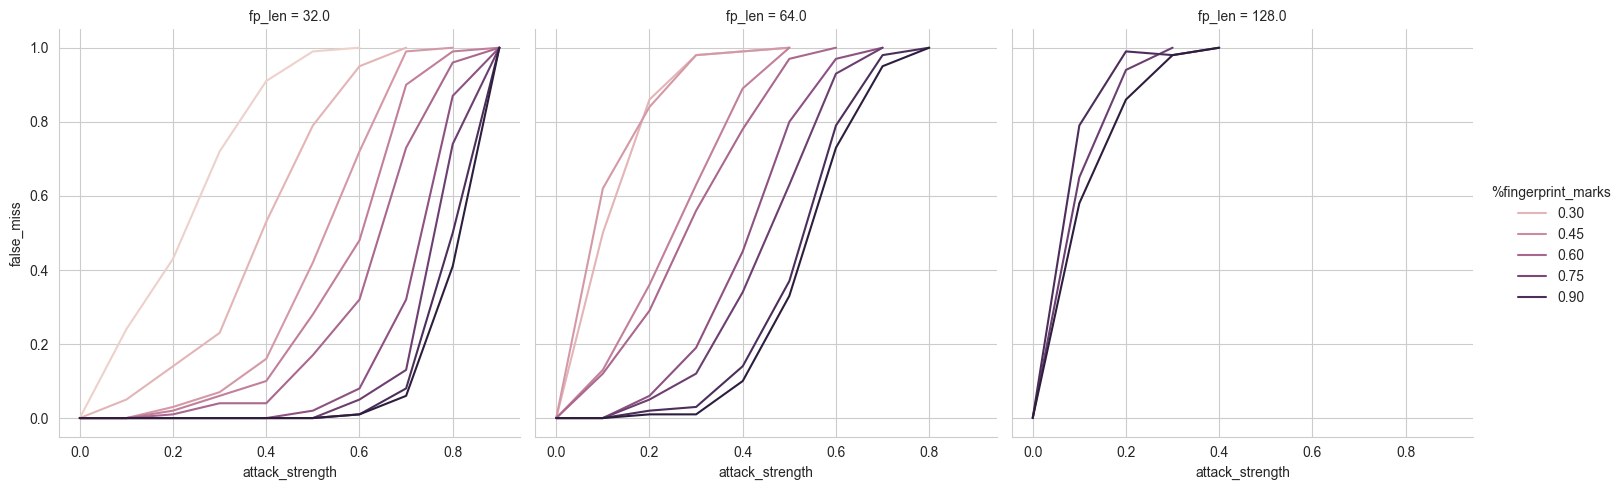

In [6]:
sns.relplot(data=results_horizontal, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_horizontal_breast_cancer_w.svg')
plt.savefig('figures/robustness_horizontal_breast_cancer_w.png')

### Theoretical estimation

In [7]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_horizontal_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/horizontal_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/horizontal_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_horizontal_est = results_horizontal_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

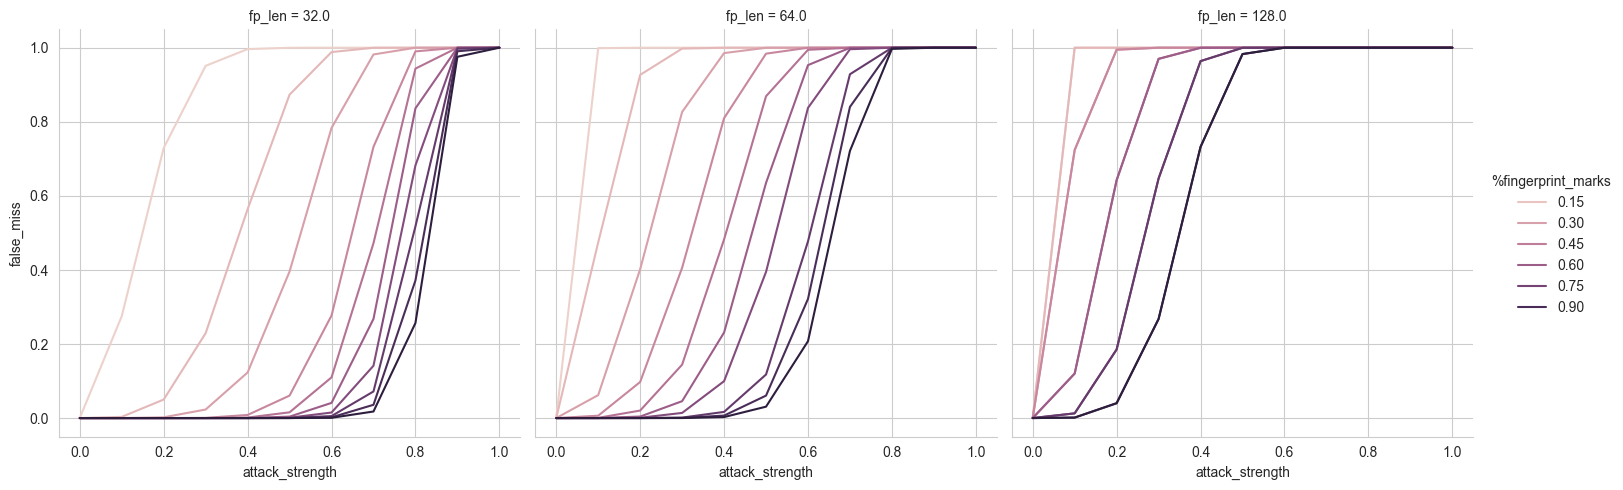

In [8]:
sns.relplot(data=results_horizontal_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison: empirical vs theoretical

In [9]:
results_horizontal['type'] = ['empirical' for i in range(len(results_horizontal))]
results_horizontal_est['type'] = ['theoretical' for i in range(len(results_horizontal_est))]

results_horizontal_comp = pd.concat([results_horizontal, results_horizontal_est])

In [11]:
results_horizontal_comp

,fp_len,gamma,LSB,attack_strength,false_miss,misattribution,%fingerprint_marks,type
0,128.0,1.0,1.0,0.0,0.00,NaN,1.0,empirical
1,128.0,1.0,1.0,0.1,0.58,NaN,1.0,empirical
2,128.0,1.0,1.0,0.2,0.86,NaN,1.0,empirical
3,128.0,1.0,1.0,0.3,0.98,NaN,1.0,empirical
4,128.0,1.0,1.0,0.4,1.00,NaN,1.0,empirical
...,...,...,...,...,...,...,...,...
325,64.0,5.0,1.0,0.6,1.00,NaN,0.2,theoretical
326,64.0,5.0,1.0,0.7,1.00,NaN,0.2,theoretical
327,64.0,5.0,1.0,0.8,1.00,NaN,0.2,theoretical
328,64.0,5.0,1.0,0.9,1.00,NaN,0.2,theoretical


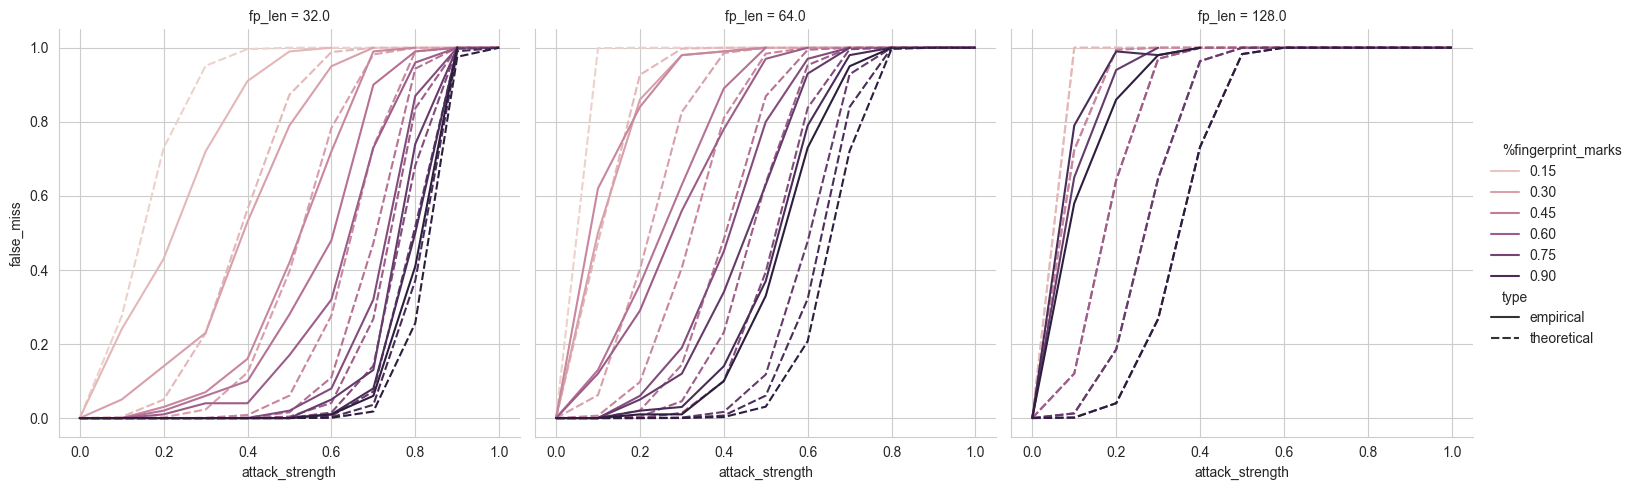

In [10]:
# plot comparison 
sns.relplot(data=results_horizontal_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_horizontal_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_horizontal_est_breast_cancer_w.png')

In [13]:
# todo: somehow represent the error (so that it somehow clearly shows that it's bigger for smaller datasets, especially when we 
# choose the bigger fp len). and maybe also show the actual distribution of the fingerprint bits(histogram of counts)

## Vertical subset attack

In [12]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_vertical = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical = results_vertical.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength_abs': float(key),
                                                    'attack_strength': float(key)/9.0,
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

In [26]:
# fill out the missing points 
# fp_len = 32.0
for fingerprint_marks in results_vertical['%fingerprint_marks'].unique():
    results_vertical.loc[len(results_vertical.index)] = [32.0, -1, 1.0, 0.8, 1.0, '' , fingerprint_marks, '', 'empirical']
# fp_len = 64.0
for fingerprint_marks in results_vertical['%fingerprint_marks'].unique()[:-1]:
    results_vertical.loc[len(results_vertical.index)] = [64.0, -1, 1.0, 0.8, 1.0, '' , fingerprint_marks, '', 'empirical']
# fp_len = 128.0
for fingerprint_marks in results_vertical['%fingerprint_marks'].unique()[:2]:
    results_vertical.loc[len(results_vertical.index)] = [128.0, -1, 1.0, 0.8, 1.0, '' , fingerprint_marks, '', 'empirical']

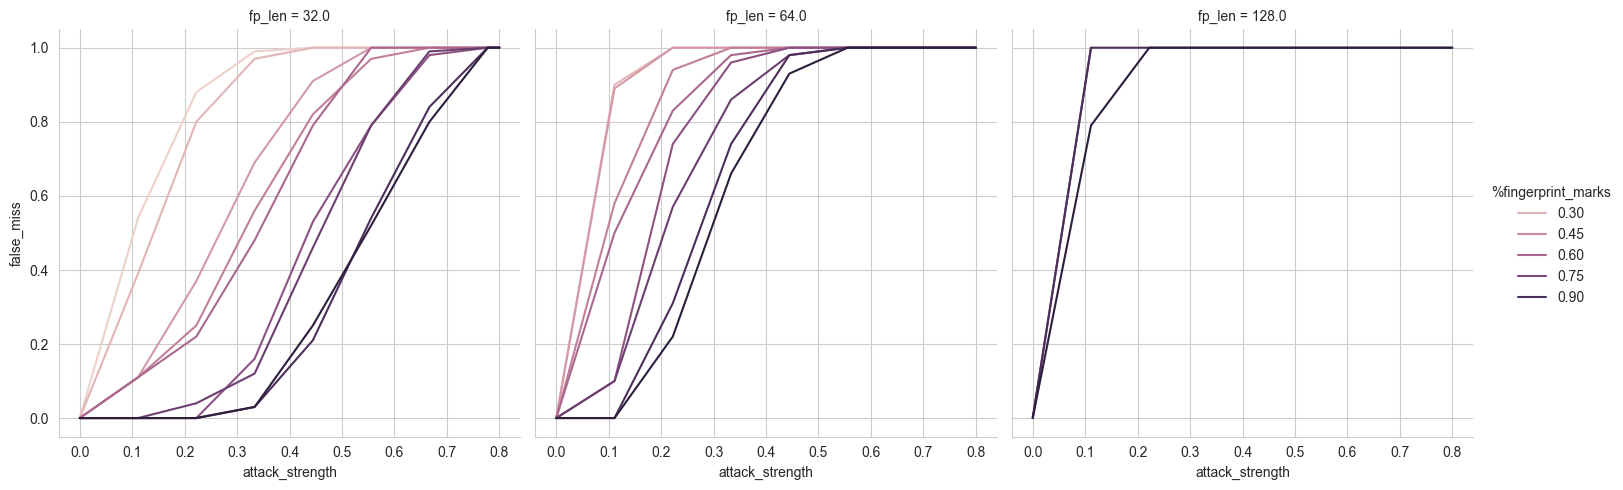

In [29]:
sns.relplot(data=results_vertical, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_vertical_breast_cancer_w.svg')
plt.savefig('figures/robustness_vertical_breast_cancer_w.png')

### Theoretical estimation

In [14]:
results_vertical_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/vertical_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/vertical_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_vertical_est = results_vertical_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 

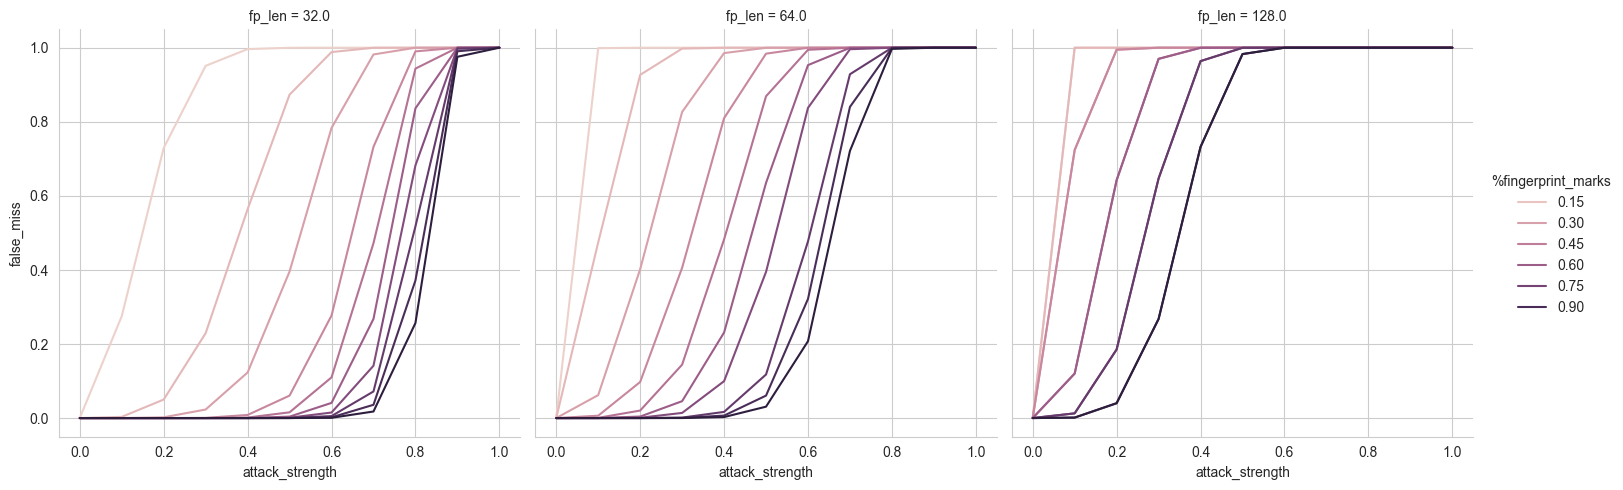

In [15]:
sns.relplot(data=results_vertical_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')

### Comparison emphirical vs theoretical

In [30]:
results_vertical['type'] = ['empirical' for i in range(len(results_vertical))]
results_vertical_est['type'] = ['theoretical' for i in range(len(results_vertical_est))]

results_vertical_comp = pd.concat([results_vertical, results_vertical_est])

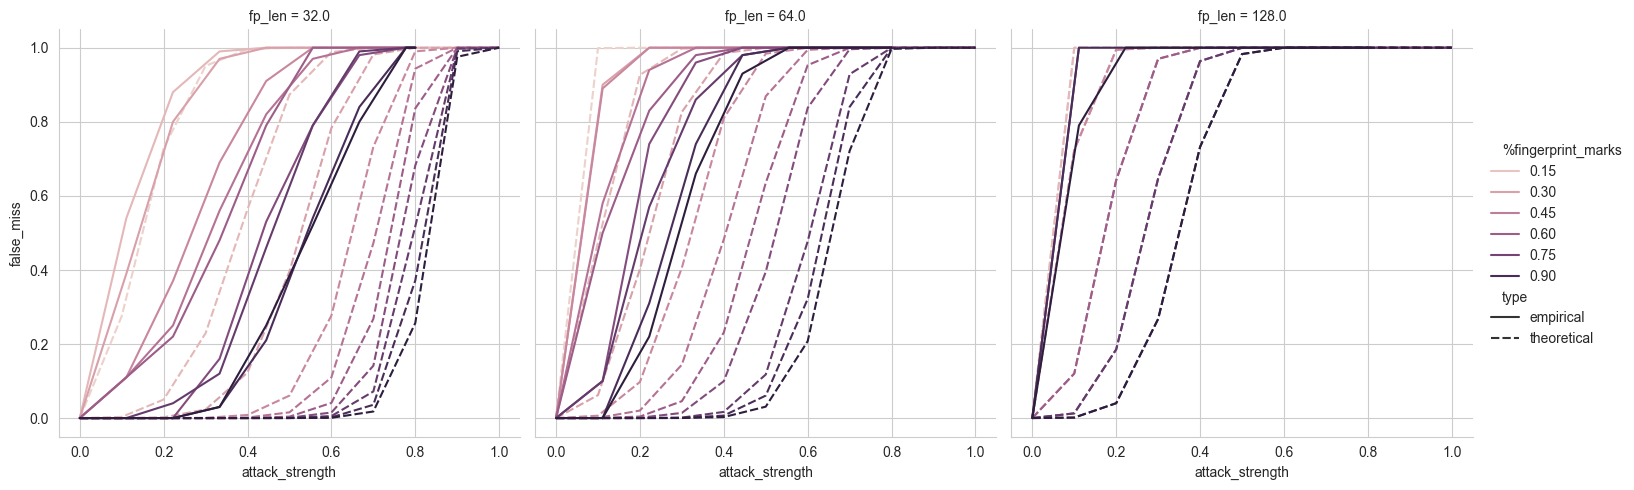

In [31]:
# plot comparison 
sns.relplot(data=results_vertical_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_vertical_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_vertical_est_breast_cancer_w.png')

## Flipping attack

In [38]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_flipping = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping = results_flipping.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


In [39]:
results_flipping

,fp_len,gamma,xi,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.00,NaN,1.0
1,128.0,1.00,1.0,0.1,1.00,NaN,1.0
2,128.0,1.00,2.0,0.0,0.00,NaN,1.0
3,128.0,1.00,2.0,0.1,1.00,NaN,1.0
4,128.0,1.00,4.0,0.0,0.00,NaN,1.0
...,...,...,...,...,...,...,...
306,64.0,3.33,2.0,0.1,0.99,NaN,0.3
307,64.0,3.33,2.0,0.2,1.00,NaN,0.3
308,64.0,3.33,4.0,0.0,0.00,NaN,0.3
309,64.0,3.33,4.0,0.1,0.92,NaN,0.3


In [40]:
# fill out missing data points
# xi=1, fp_len=32.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [32.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]
# xi=1, fp_len=64.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [64.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]
# xi=1, fp_len=128.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [128.0, -1, 1.0, 1.0, 1.0, '' , fingerprint_marks]

In [42]:
# xi=2, fp_len=32.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [32.0, -1, 2.0, 1.0, 1.0, '' , fingerprint_marks]
# xi=2, fp_len=64.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [64.0, -1, 2.0, 1.0, 1.0, '' , fingerprint_marks]
# xi=2, fp_len=128.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [128.0, -1, 2.0, 1.0, 1.0, '' , fingerprint_marks]

In [43]:
# xi=4, fp_len=32.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [32.0, -1, 4.0, 1.0, 1.0, '' , fingerprint_marks]
# xi=4, fp_len=64.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [64.0, -1, 4.0, 1.0, 1.0, '' , fingerprint_marks]
# xi=4, fp_len=128.0 
for fingerprint_marks in results_flipping['%fingerprint_marks'].unique():
    results_flipping.loc[len(results_flipping.index)] = [128.0, -1, 4.0, 1.0, 1.0, '' , fingerprint_marks]

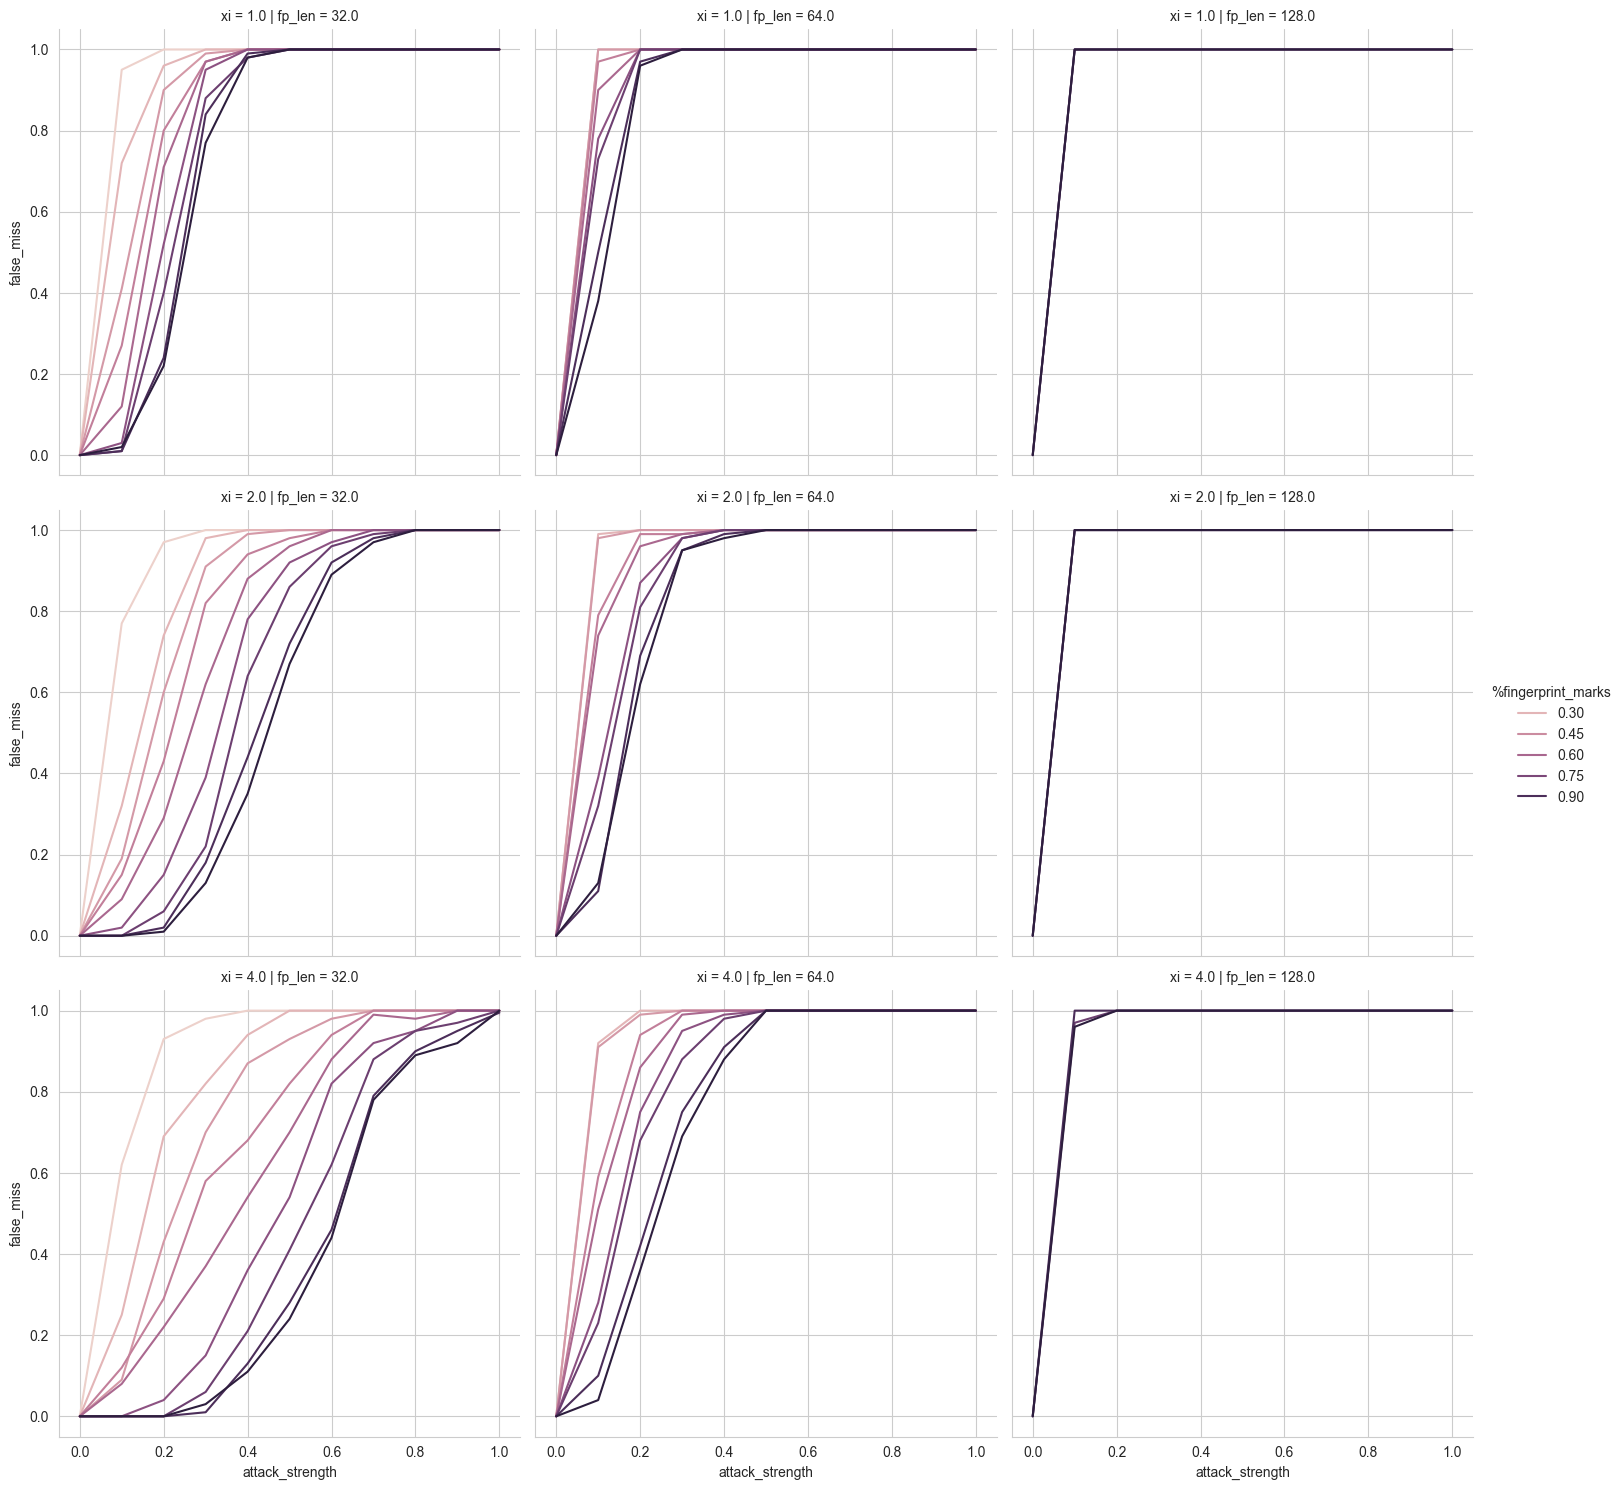

In [44]:
sns.relplot(data=results_flipping, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_flipping_breast_cancer_w.svg')
plt.savefig('figures/robustness_flipping_breast_cancer_w.png')

### Comparison empirical vs theoretical

In [45]:
results_flipping_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/flipping_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/flipping_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_flipping_est = results_flipping_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              'xi': xi,
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 


In [46]:
results_flipping['type'] = ['empirical' for i in range(len(results_flipping))]
results_flipping_est['type'] = ['theoretical' for i in range(len(results_flipping_est))]

results_flipping_comp = pd.concat([results_flipping, results_flipping_est])

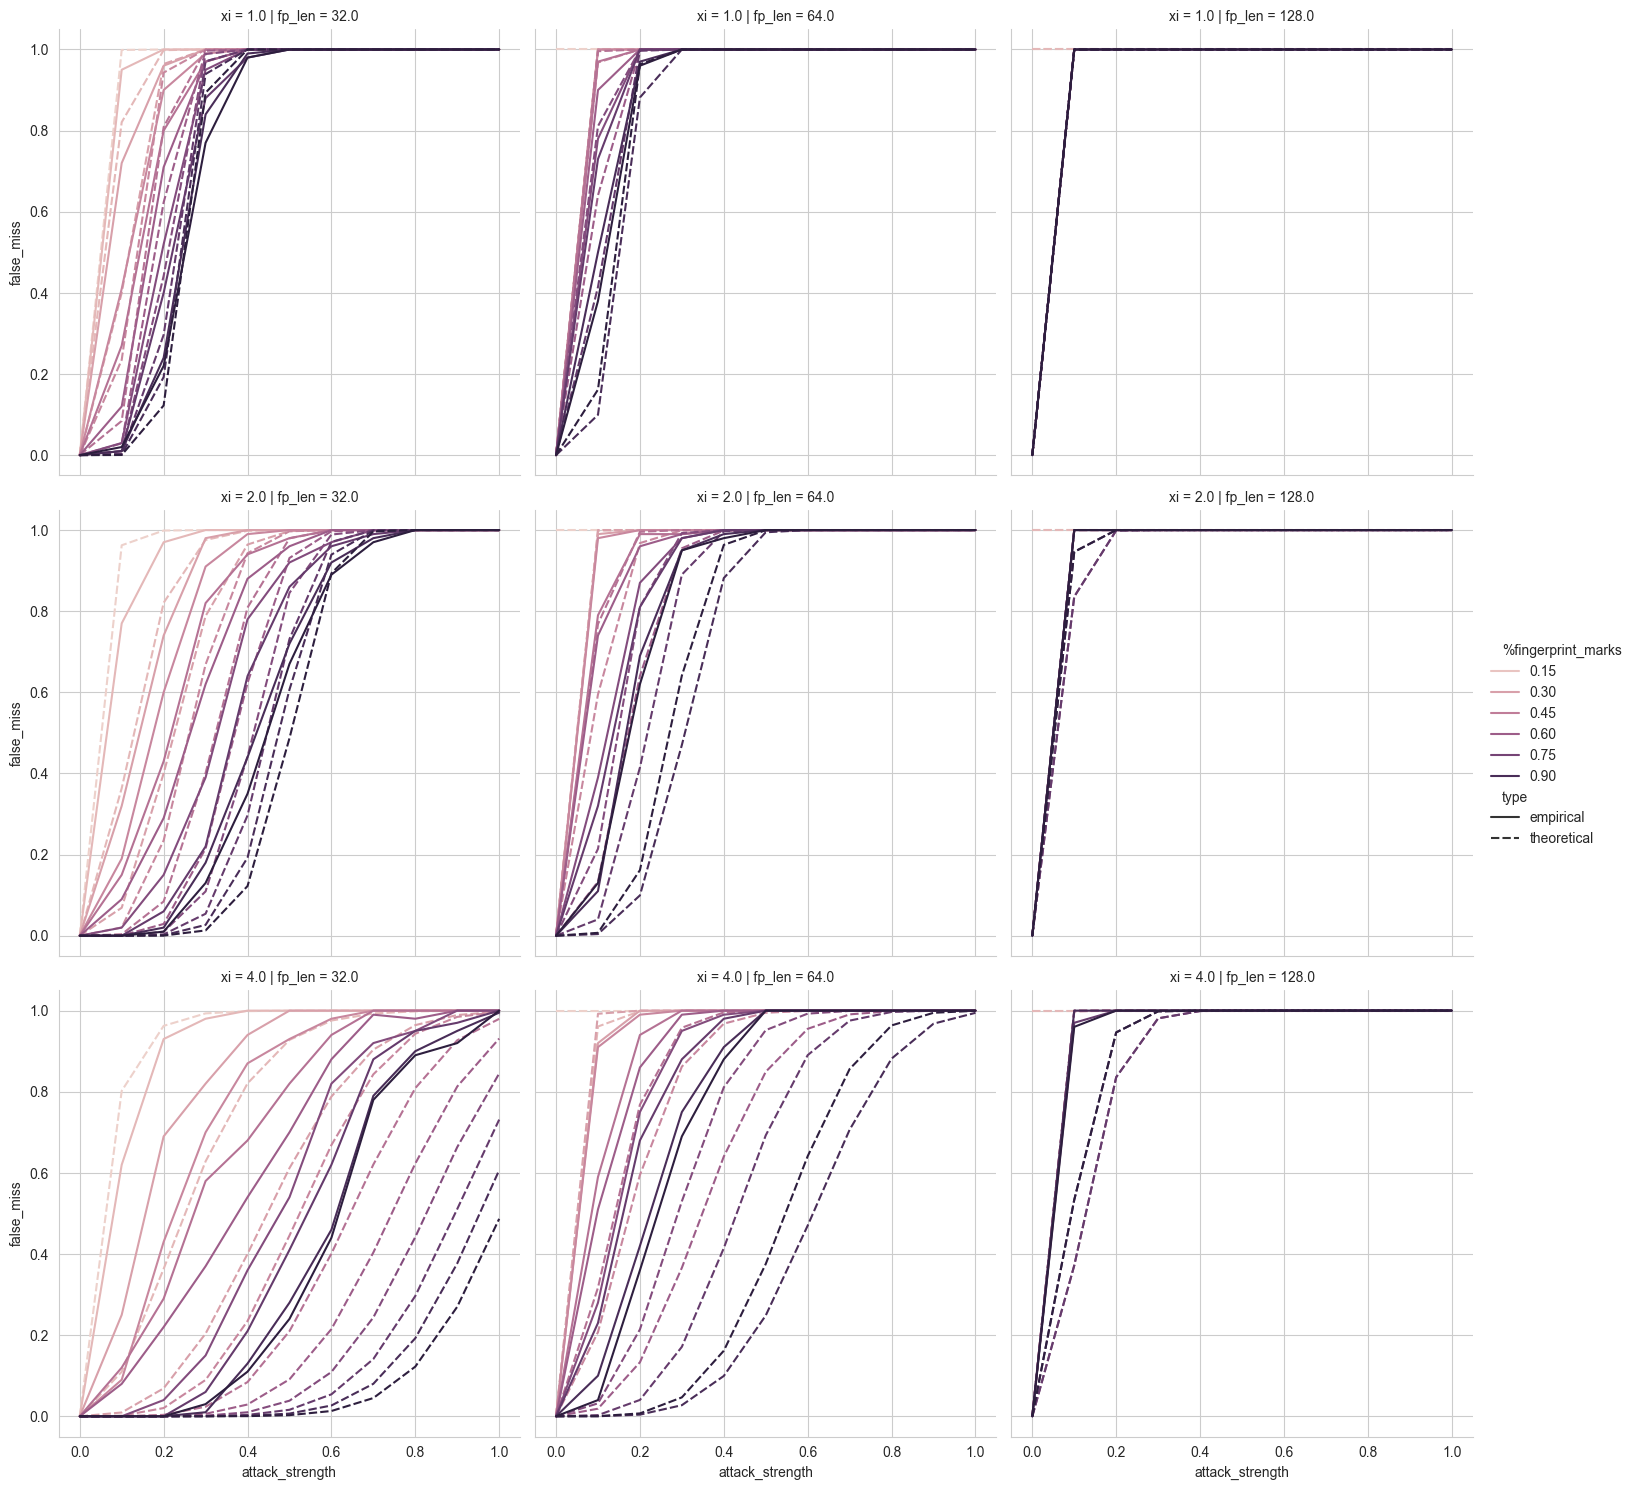

In [47]:
# plot comparison 
sns.relplot(data=results_flipping_comp, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', row='xi', style='type')
plt.savefig('figures/robustness_flipping_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_flipping_est_breast_cancer_w.png')

## Rounding attack

In [19]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_rounding = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/rounding/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/rounding/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_rounding = results_rounding.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = v


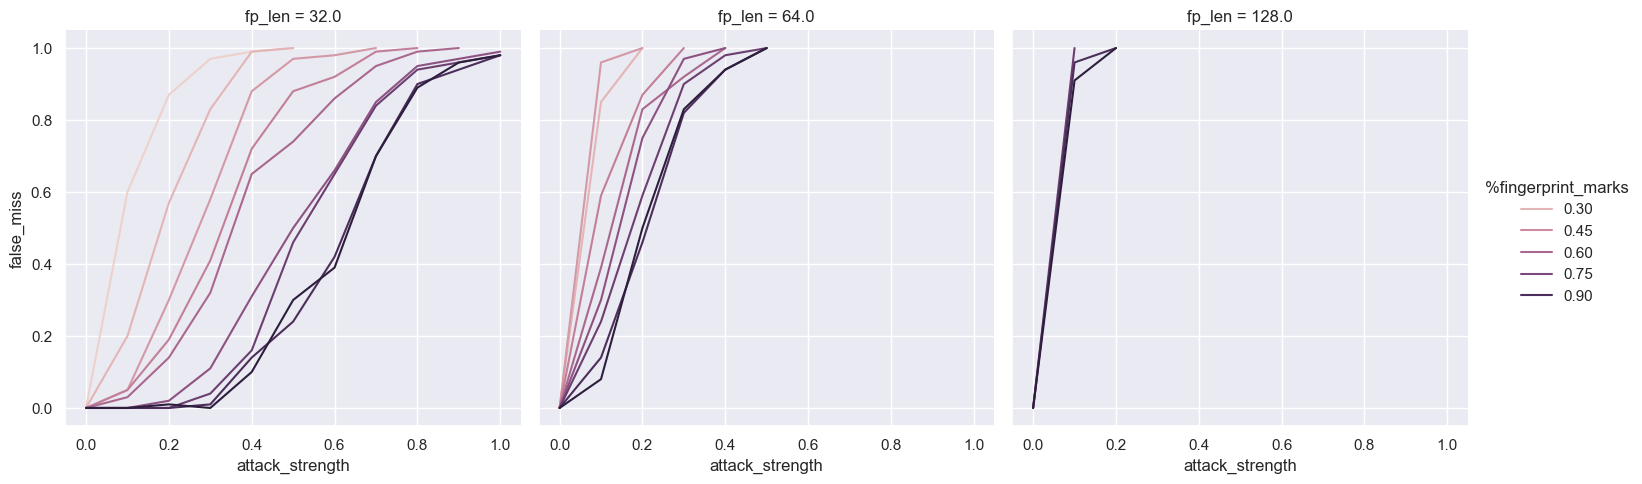

In [25]:
sns.relplot(data=results_rounding[results_rounding['xi']==1], kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_rounding_breast_cancer_w.svg')
plt.savefig('figures/robustness_rounding_breast_cancer_w.png')

### Comparison to the theoretical estimate

In [21]:
results_rounding_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/rounding_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/rounding_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_rounding_est = results_rounding_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              'xi': xi,
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 


In [26]:
results_rounding['type'] = ['empirical' for i in range(len(results_rounding))]
results_rounding_est['type'] = ['theoretical' for i in range(len(results_rounding_est))]

results_rounding_comp = pd.concat([results_rounding, results_rounding_est])

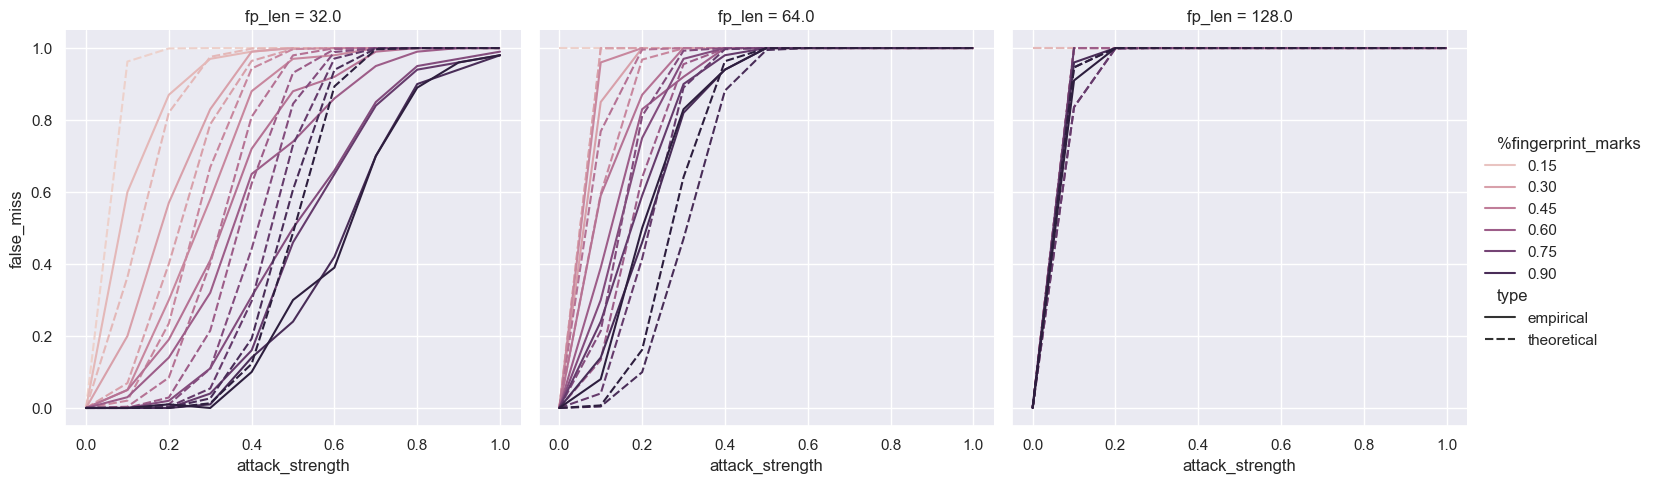

In [28]:
# plot comparison 
sns.relplot(data=results_rounding_comp[results_rounding_comp['xi']==1], kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len', style='type')
plt.savefig('figures/robustness_rounding_est_breast_cancer_w.svg')
plt.savefig('figures/robustness_rounding_est_breast_cancer_w.png')

## Superset

In [48]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [49]:
results_frame

,fp_len,gamma,xi,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.00,NaN,1.0
1,128.0,1.00,1.0,0.1,0.89,NaN,1.0
2,128.0,1.00,1.0,0.2,1.00,NaN,1.0
3,128.0,1.11,1.0,0.0,0.00,NaN,0.9
4,128.0,1.11,1.0,0.1,0.91,NaN,0.9
...,...,...,...,...,...,...,...
119,64.0,2.50,1.0,0.3,1.00,NaN,0.4
120,64.0,3.33,1.0,0.0,0.00,NaN,0.3
121,64.0,3.33,1.0,0.1,0.91,NaN,0.3
122,64.0,3.33,1.0,0.2,0.99,NaN,0.3


In [50]:
# fill out missing values
# xi=1, fp_len=32.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [32.0, -1, 1.0, 0.8, 1.0, '' , fingerprint_marks]
# xi=1, fp_len=64.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [64.0, -1, 1.0, 0.8, 1.0, '' , fingerprint_marks]
# xi=1, fp_len=128.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [128.0, -1, 1.0, 0.8, 1.0, '' , fingerprint_marks]

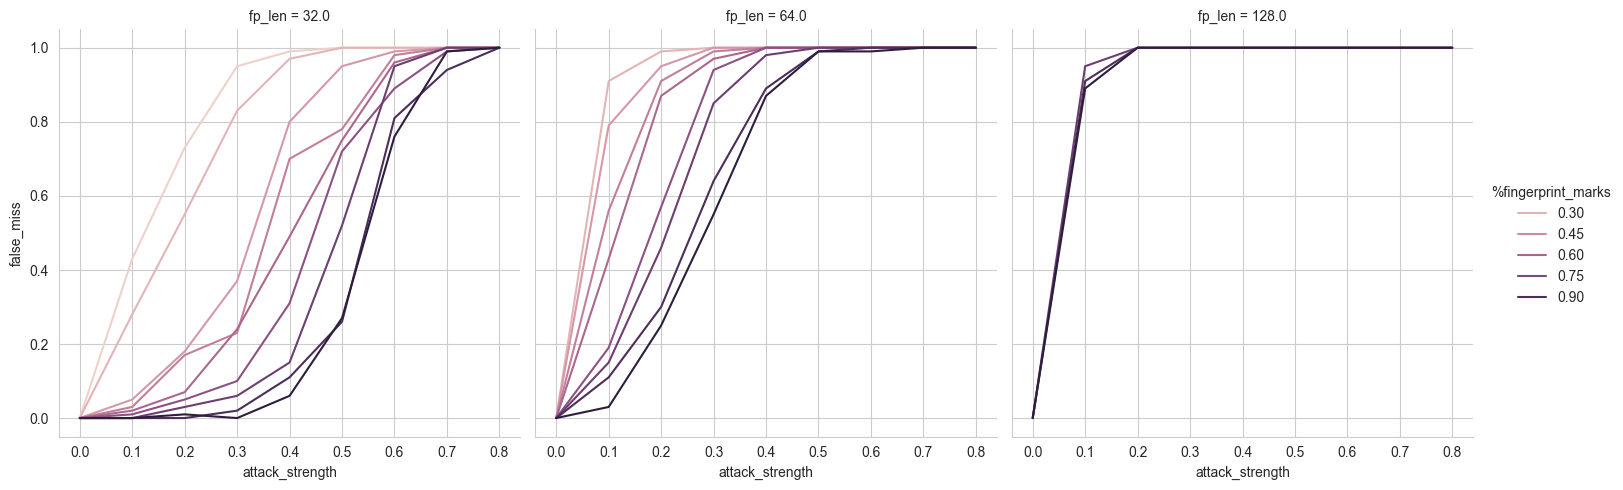

In [51]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len')
plt.savefig('figures/robustness_superset_breast_cancer_w.svg')
plt.savefig('figures/robustness_superset_breast_cancer_w.png')

### Pure superset theoretical estimation

In [32]:
results_superset_p_est = pd.DataFrame(columns=['fp_len', 'gamma', 'LSB', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/superset_pure_est/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/superset_pure_est/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_superset_p_est = results_superset_p_est.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              'xi': xi,
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'LSB': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 
 


In [ ]:
results_rounding['type'] = ['empirical' for i in range(len(results_rounding))]
results_rounding_est['type'] = ['theoretical' for i in range(len(results_rounding_est))]

results_rounding_comp = pd.concat([results_rounding, results_rounding_est])

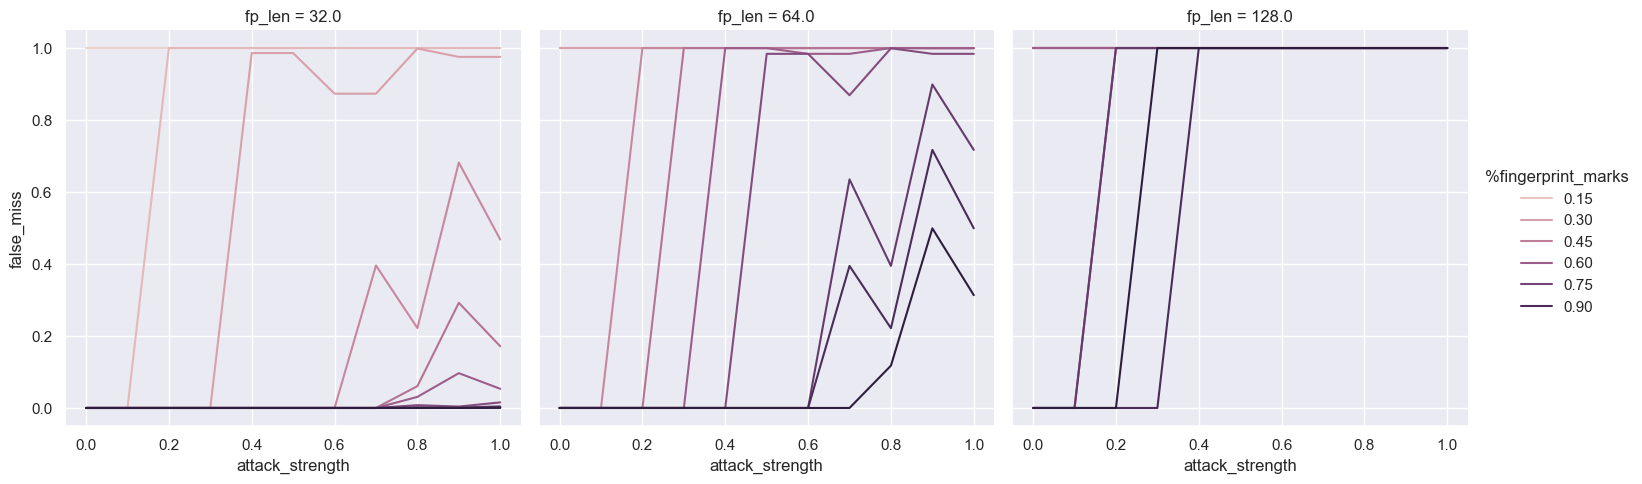

In [33]:
# plot comparison 
sns.relplot(data=results_superset_p_est, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks', 
           col='fp_len')
#plt.savefig('figures/robustness_rounding_est_breast_cancer_w.svg')
#plt.savefig('figures/robustness_rounding_est_breast_cancer_w.png')

## Combination attack
Superset attack (horizontal subset + synthetic imputation) + flipping attack

In [52]:
# load results of the analyses: evaluation/robustness/horizontal/breast_cancer_w
results_frame = pd.DataFrame(columns=['fp_len', 'gamma', 'xi', 'attack_strength', 'false_miss', 'misattribution'])
all_results = os.listdir('robustness/combination/breast_cancer_w')
for result_file in all_results:
    file_name = result_file.split('_')
    xi = int(file_name[-1][1:-5])
    gamma = float(file_name[-2][1:])
    fp_len = int(file_name[-3][1:])
    measure = file_name[-4] 
    if measure == 'miss': 
        measure = 'false_miss' 
    else: 
        continue
    with open('robustness/combination/breast_cancer_w/' + result_file, 'r') as infile:
        false_miss = json.load(infile)
    for key, value in false_miss.items():
        results_frame = results_frame.append({'fp_len': int(fp_len), 
                                              'gamma' : gamma, 
                                              '%fingerprint_marks': round(1/gamma,2),
                                              'xi': int(xi), 
                                              'attack_strength': float(key),
                                             'false_miss': value}, ignore_index = True)
    #with open('evaluation/robustness/horizontal/breast_cancer_w/misattribution_l{}_g{}_x{}.json'.format(fp_len, gamma, xi), 'r') as infile:
    #    misattribution = json.load(infile)
    #for key, value in misattribution.items():
    #    results_frame['misattribution'].loc[-1] = 


In [54]:
results_frame

,fp_len,gamma,xi,attack_strength,false_miss,misattribution,%fingerprint_marks
0,128.0,1.00,1.0,0.0,0.0,NaN,1.0
1,128.0,1.00,1.0,0.1,1.0,NaN,1.0
2,128.0,1.00,2.0,0.0,0.0,NaN,1.0
3,128.0,1.00,2.0,0.1,1.0,NaN,1.0
4,128.0,1.00,4.0,0.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...
225,64.0,3.33,1.0,0.1,1.0,NaN,0.3
226,64.0,3.33,2.0,0.0,0.0,NaN,0.3
227,64.0,3.33,2.0,0.1,1.0,NaN,0.3
228,64.0,3.33,4.0,0.0,0.0,NaN,0.3


In [55]:
# fill out missing edge data points
# xi=1, fp_len=32.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [32.0, -1, 1.0, 0.6, 1.0, '' , fingerprint_marks]
# xi=1, fp_len=64.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [64.0, -1, 1.0, 0.6, 1.0, '' , fingerprint_marks]
# xi=1, fp_len=128.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [128.0, -1, 1.0, 0.6, 1.0, '' , fingerprint_marks]

In [57]:
# xi=2, fp_len=32.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [32.0, -1, 2.0, 0.6, 1.0, '' , fingerprint_marks]
# xi=2, fp_len=64.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [64.0, -1, 2.0, 0.6, 1.0, '' , fingerprint_marks]
# xi=2, fp_len=128.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [128.0, -1, 2.0, 0.6, 1.0, '' , fingerprint_marks]

In [58]:
# xi=4, fp_len=32.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [32.0, -1, 4.0, 0.6, 1.0, '' , fingerprint_marks]
# xi=4, fp_len=64.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [64.0, -1, 4.0, 0.6, 1.0, '' , fingerprint_marks]
# xi=4, fp_len=128.0 
for fingerprint_marks in results_frame['%fingerprint_marks'].unique():
    results_frame.loc[len(results_frame.index)] = [128.0, -1, 4.0, 0.6, 1.0, '' , fingerprint_marks]

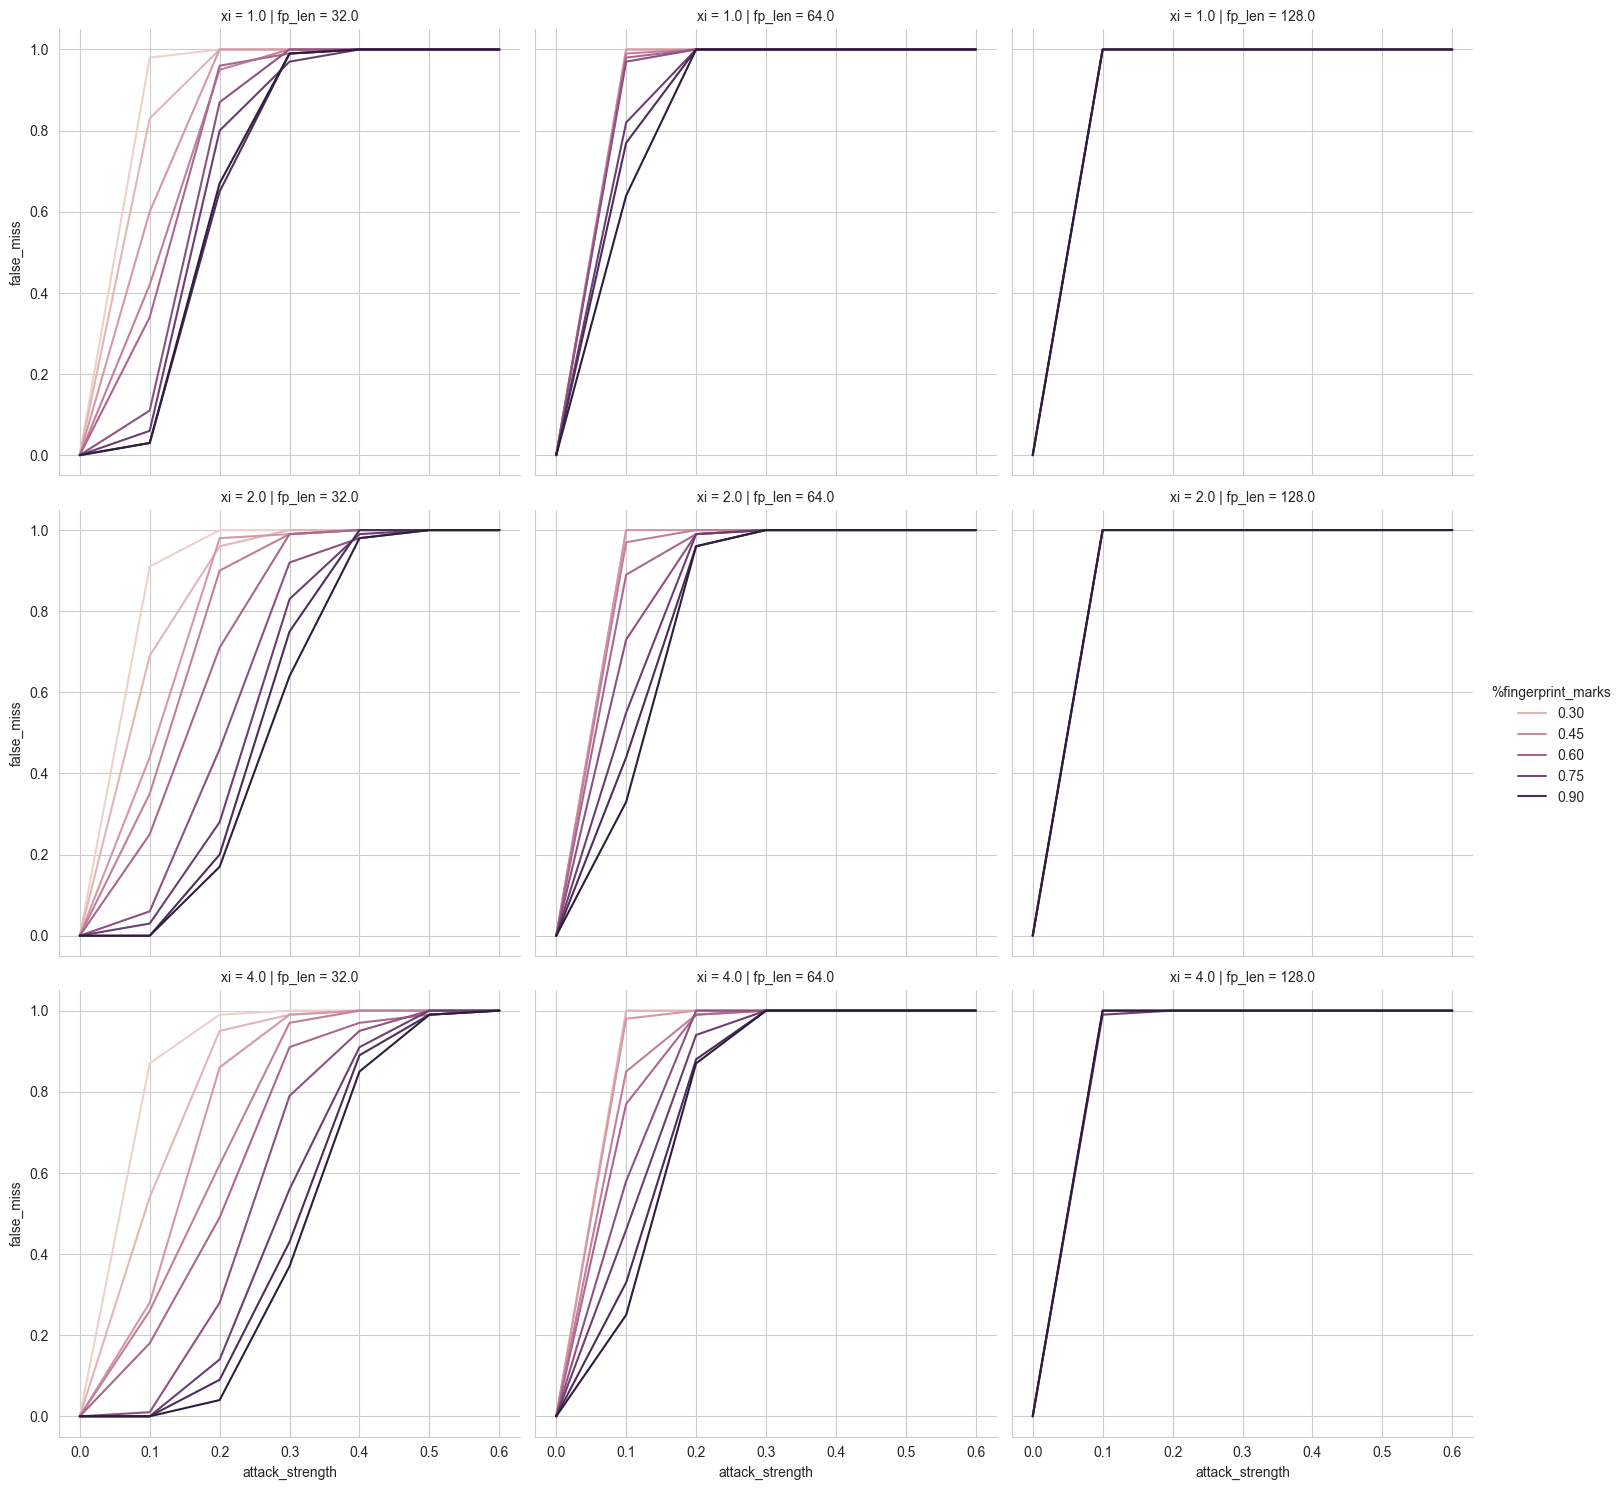

In [59]:
sns.relplot(data=results_frame, kind='line',
           x='attack_strength', y='false_miss', hue='%fingerprint_marks',
           col='fp_len', row='xi')
plt.savefig('figures/robustness_combination_breast_cancer_w.svg')
plt.savefig('figures/robustness_combination_breast_cancer_w.png')